**Rıza Özçelik**

Link to GitHub: https://github.com/rizaozcelik/capacity-scaling

In [142]:
from scipy.stats import skewnorm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

from ipywidgets import interact
experiment_results_path = './experiments/results/'

# Capacity Scaling vs Linear Programming

## Experiment 1

This experiment provides an overview comparison of five different solutions to maximum flow problem under various configurations which are variants of capacity scaling and linear programming approaches. Namely, these variants are as follows:

* **Capacity Scaling with BFS:** This is an implementation of the capacity scaling algorithm where at each step, path finding is done via BFS.
* **Capacity Scaling with DFS:** This is an implementation of the capacity scaling algorithm where at each step, path finding is done via DFS.
* **Capacity Scaling with Heap:** This is a variant of the original capacity scaling algorithm where Delta update is done via help of a heap that contains the edges in the graph. In this scheme, at each Delta updating step, new Delta is set to the capacity of the edge that is in the middle position when edges are ranked with respect to their capacities. This scheme is different from the original Delta update rule, where Delta is divided by two at each step. Note that this algorithm also uses BFS for path finding.
* **Linear Programming with Gurobi:** In this implementation, maximum flow problem is formulated in the form a LP compatible with gurobipy and solved. 
* **Linear Programming with Scipy:** In this implementation, maximum flow problem is formulated in the form a LP compatible with scipy and solved. 

Configuration of these experiments are generated with respect to node/edge count and edge capacity distribution with different mean, variance, skew and shape. Here are the resulting comparison plots.

In [98]:
experiment_results1 = pd.read_csv(experiment_results_path + 'experiment1.csv', sep='|')
experiment_results1 = experiment_results1.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results1['execution_time'] = experiment_results1['execution_time'].astype(float)
experiment_results1['edge_count'] = experiment_results1.node_count * experiment_results1.density
experiment_results1['node*edge_count'] = experiment_results1.node_count * experiment_results1.edge_count

algo_names = experiment_results1.name.unique()
experiment_results1

,iter,name,node_count,density,distribution_name,mean,std,skewness,execution_time,Deltas,deltas,edge_count,node*edge_count
0,0,cs_bfs,50,0.2,normal,1000,50,-10,0.042975,"[64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64....","[993.0, 960.0, 889.0, 917.0, 956.0, 962.0, 944...",10.0,500.0
1,0,cs_dfs,50,0.2,normal,1000,50,-10,0.043975,"[64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64....","[993.0, 937.0, 945.0, 937.0, 982.0, 904.0, 947...",10.0,500.0
2,0,cs_heap,50,0.2,normal,1000,50,-10,0.189909,"[64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64.0, 64....","[993.0, 960.0, 889.0, 917.0, 956.0, 962.0, 944...",10.0,500.0
3,0,gurobi,50,0.2,normal,1000,50,-10,3.754902,NaN,NaN,10.0,500.0
4,0,scipy,50,0.2,normal,1000,50,-10,5.177038,NaN,NaN,10.0,500.0
5,1,cs_bfs,50,0.2,normal,1000,50,10,0.051978,"[128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128...","[1041.0, 1035.0, 1037.0, 995.0, 1024.0, 1072.0...",10.0,500.0
6,1,cs_dfs,50,0.2,normal,1000,50,10,0.046984,"[128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128...","[1006.0, 999.0, 1031.0, 1029.0, 1006.0, 1080.0...",10.0,500.0
7,1,cs_heap,50,0.2,normal,1000,50,10,0.203888,"[128.0, 128.0, 128.0, 128.0, 128.0, 128.0, 128...","[1041.0, 1035.0, 1037.0, 995.0, 1024.0, 1072.0...",10.0,500.0
8,1,gurobi,50,0.2,normal,1000,50,10,3.629923,NaN,NaN,10.0,500.0
9,1,scipy,50,0.2,normal,1000,50,10,3.057224,NaN,NaN,10.0,500.0


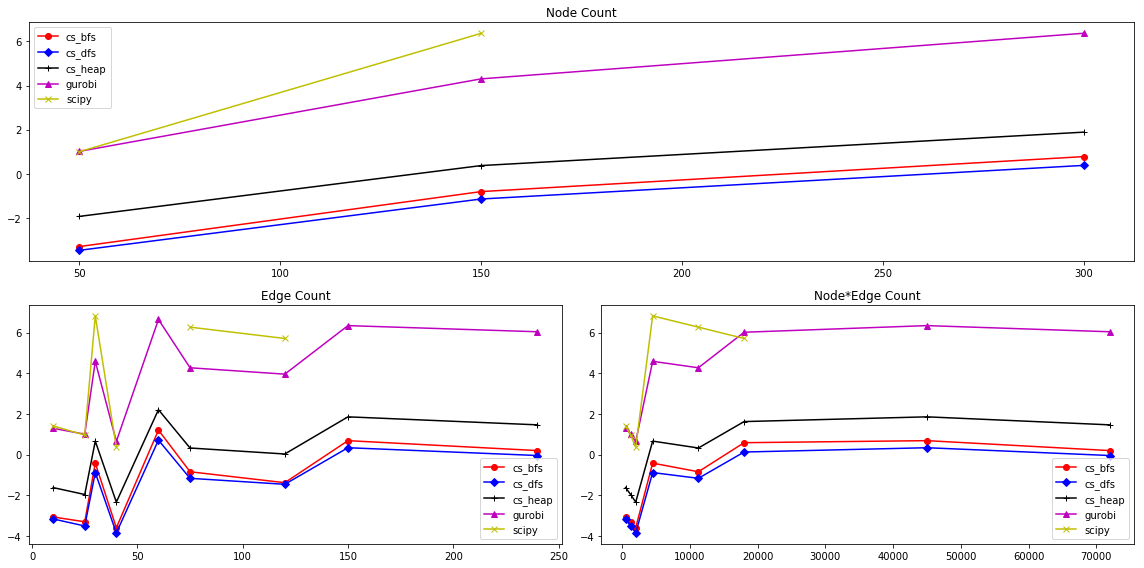

In [94]:
# node count effect
results_by_node_count = experiment_results1.groupby(['name', 'node_count'])['execution_time'].mean()
results_by_edge_count = experiment_results1.groupby(['name', 'edge_count'])['execution_time'].mean()
results_by_node_edge_count = experiment_results1.groupby(['name', 'node*edge_count'])['execution_time'].mean()


markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
ax.set_title('Node Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_node_count[name]), label=name, marker=marker, color=color)
plt.legend()
    
ax = plt.subplot(gs[1, 0])
ax.set_title('Edge Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_edge_count[name]), label=name, marker=marker, color=color)  
plt.legend()

ax = plt.subplot(gs[1, 1])
ax.set_title('Node*Edge Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(np.log(results_by_node_edge_count[name]), label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()


In [144]:
def plot_histogram(distribution,mean,std,skewness):
    random_numbers = skewnorm.rvs(a=skewness, loc=mean, scale=std, size=1000)
    sns.distplot(random_numbers,bins=int(max(random_numbers)+1-min(random_numbers)),color='b')
    plt.show()
    
means = [50, 1000]
stds = [3, 30]
skews = [-10,0,10]
interact(plot_histogram,distribution=['normal'],mean=means,std=stds,skewness=skews);

interactive(children=(Dropdown(description='distribution', options=('normal',), value='normal'), Dropdown(desc…

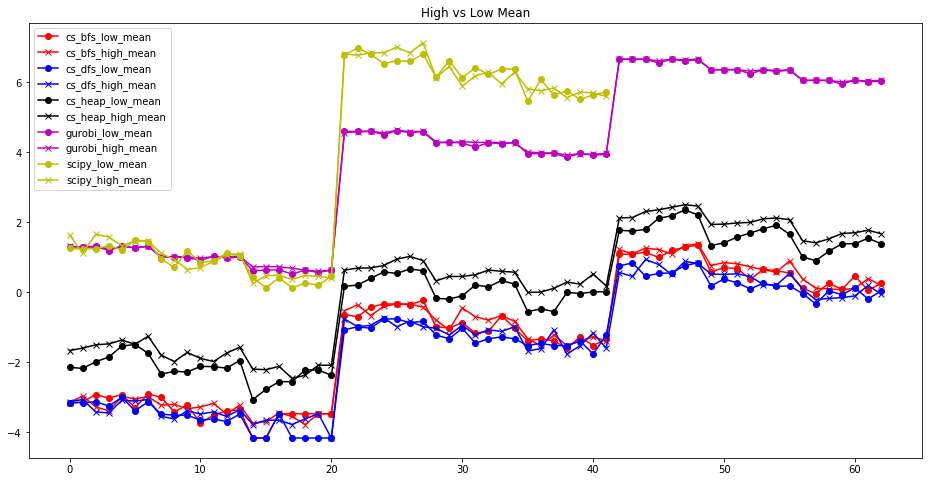

In [134]:
high_mean_results = experiment_results1[experiment_results1['mean'] == 1000]
low_mean_results = experiment_results1[experiment_results1['mean'] == 50]

markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

plt.figure(figsize=(16,8))
x_values = range(len(high_mean_results.index) // 5)
plt.title('High vs Low Mean')
for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(low_mean_results[low_mean_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_low_mean')
    plt.plot(x_values, np.log(high_mean_results[high_mean_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_high_mean')

plt.legend();

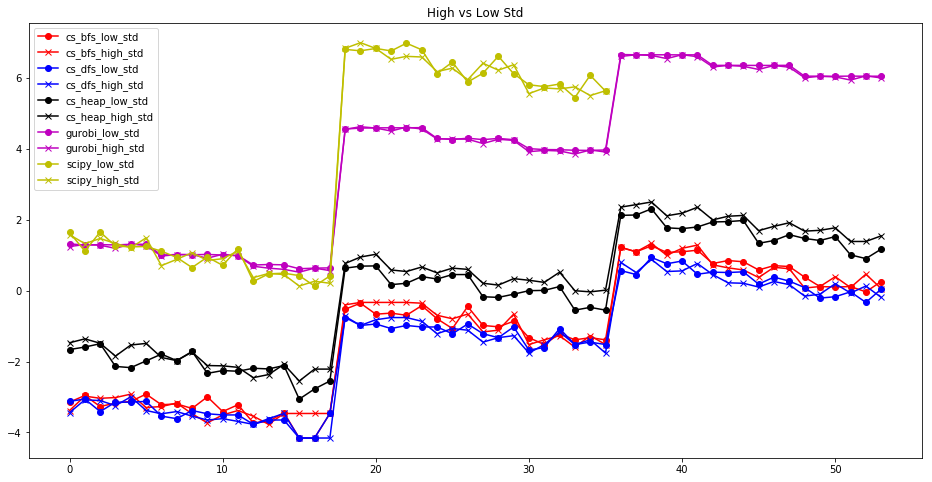

In [135]:
low_std_results = experiment_results1[(experiment_results1['std'] == '50') | (experiment_results1['std'] == '3')]
high_std_results = experiment_results1[(experiment_results1['std'] == '500') | (experiment_results1['std'] == '30')]

markers = ['o','D','+', '^', 'x']
colors = ['r','b','k','m','y']

plt.figure(figsize=(16,8))
plt.title('High vs Low Std')
x_values = range(len(low_std_results.index) // 5)
for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(low_std_results[low_std_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_low_std')
    plt.plot(x_values, np.log(high_std_results[high_std_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_high_std')

plt.legend();

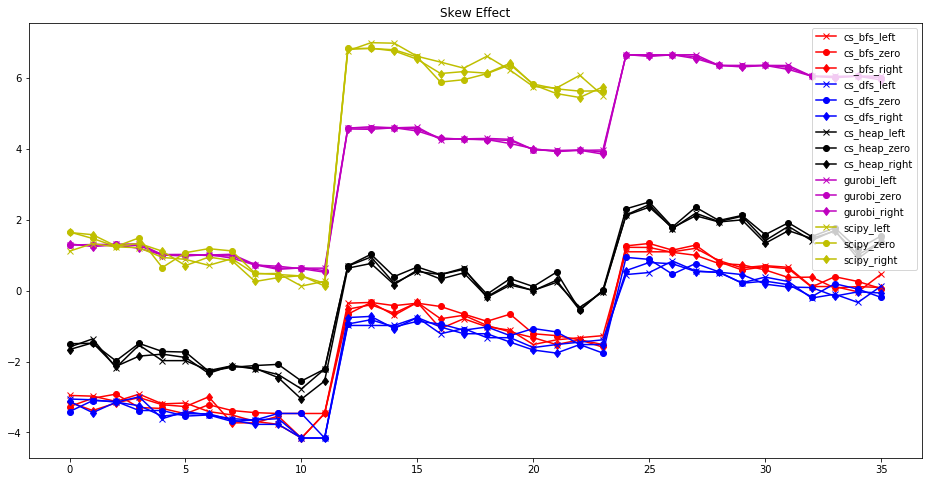

In [146]:
left_skew_results = experiment_results1[experiment_results1['skewness'] == '10']
zero_skew_results = experiment_results1[experiment_results1['skewness'] == '0' ]
right_skew_results = experiment_results1[experiment_results1['skewness'] == '-10']


colors = ['r','b','k','m','y']

plt.figure(figsize=(16,8))
plt.title('Skew Effect')
x_values = range(len(left_skew_results.index) // 5)
for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.log(left_skew_results[left_skew_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, np.log(zero_skew_results[zero_skew_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, np.log(right_skew_results[right_skew_results['name'] == name]['execution_time']), marker='d', color=color, label=name+'_right')
    
plt.legend();

## Experiment 2

This experiment is to compare of the effect of path finding algorithm in capactiy scaling. To do so, capacity scaling is run with different node counts and densities with differently skewed normal distributions  

In [147]:
experiment_results2 = pd.read_csv(experiment_results_path + 'experiment2_bfs_vs_dfs.csv', sep='|')
experiment_results2 = experiment_results2.replace({'ERROR':np.nan, 'None':np.nan})
experiment_results2['execution_time'] = experiment_results2['execution_time'].astype(float)
experiment_results2['edge_count'] = experiment_results2.node_count * experiment_results2.density
experiment_results2['node*edge_count'] = experiment_results2.node_count * experiment_results2.edge_count
algo_names = experiment_results2.name.unique()
experiment_results2

,iter,name,node_count,density,distribution_name,mean,std,skewness,execution_time,Deltas,deltas,edge_count,node*edge_count
0,0,cs_bfs,25,0.2,normal,50,30,-10,0.010989,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[20.0, 31.0, 39.0, 23.0, 49.0, 44.0, 25.0, 24....",5.0,125.0
1,0,cs_dfs,25,0.2,normal,50,30,-10,0.009975,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[24.0, 29.0, 24.0, 25.0, 31.0, 24.0, 44.0, 49....",5.0,125.0
2,1,cs_bfs,25,0.2,normal,50,30,10,0.009993,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[77.0, 60.0, 66.0, 56.0, 46.0, 70.0, 63.0, 56....",5.0,125.0
3,1,cs_dfs,25,0.2,normal,50,30,10,0.013977,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[77.0, 75.0, 70.0, 51.0, 55.0, 56.0, 46.0, 73....",5.0,125.0
4,2,cs_bfs,25,0.2,normal,50,30,0,0.008995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[49.0, 35.0, 56.0, 21.0, 29.0, 51.0, 17.0, 47....",5.0,125.0
5,2,cs_dfs,25,0.2,normal,50,30,0,0.008995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[27.0, 47.0, 16.0, 17.0, 29.0, 21.0, 18.0, 24....",5.0,125.0
6,3,cs_bfs,25,0.4,normal,50,30,-10,0.009006,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[27.0, 27.0, 13.0, 29.0, 27.0, 28.0, 43.0, 12....",10.0,250.0
7,3,cs_dfs,25,0.4,normal,50,30,-10,0.006982,"[8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, ...","[12.0, 20.0, 32.0, 43.0, 17.0, 13.0, 28.0, 27....",10.0,250.0
8,4,cs_bfs,25,0.4,normal,50,30,10,0.009995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[63.0, 59.0, 57.0, 74.0, 90.0, 72.0, 52.0, 53....",10.0,250.0
9,4,cs_dfs,25,0.4,normal,50,30,10,0.009995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[58.0, 86.0, 47.0, 54.0, 53.0, 57.0, 51.0, 51....",10.0,250.0


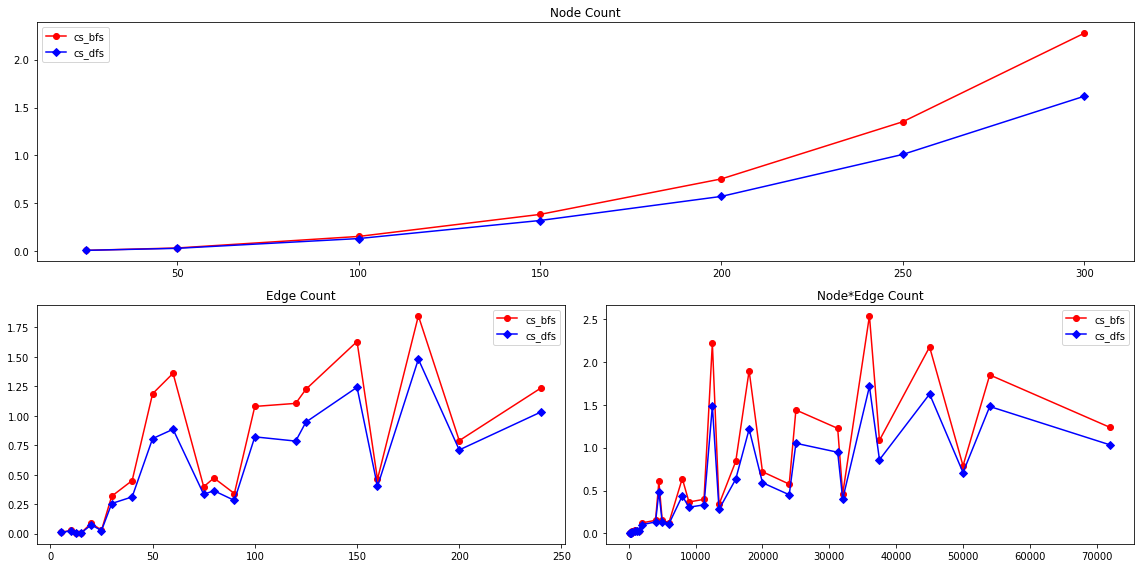

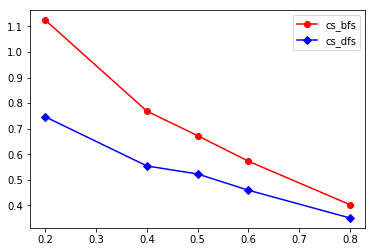

In [174]:
results_by_node_count = experiment_results2.groupby(['name', 'node_count'])['execution_time'].mean()
results_by_edge_count = experiment_results2.groupby(['name', 'edge_count'])['execution_time'].mean()
results_by_node_edge_count = experiment_results2.groupby(['name', 'node*edge_count'])['execution_time'].mean()


markers = ['o','D']
colors = ['r','b']

gs = gridspec.GridSpec(2, 2)

plt.figure(figsize=(16,8))
ax = plt.subplot(gs[0, :])
ax.set_title('Node Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_node_count[name], label=name, marker=marker, color=color)
plt.legend()
    
ax = plt.subplot(gs[1, 0])
ax.set_title('Edge Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_edge_count[name], label=name, marker=marker, color=color)  
plt.legend()

ax = plt.subplot(gs[1, 1])
ax.set_title('Node*Edge Count')
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_node_edge_count[name], label=name, marker=marker, color=color)
plt.legend()

plt.tight_layout()
plt.show()

results_by_density = experiment_results2.groupby(['name', 'density'])['execution_time'].mean()
for name, marker,color in zip(algo_names,markers,colors):
    plt.plot(results_by_density[name], label=name, marker=marker, color=color)
plt.legend()
plt.show()

,index,iter,name,node_count,density,distribution_name,mean,std,skewness,execution_time,Deltas,deltas,edge_count,node*edge_count
0,3,1,cs_dfs,25,0.2,normal,50,30,10,0.013977,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[77.0, 75.0, 70.0, 51.0, 55.0, 56.0, 46.0, 73....",5.0,125.0
1,9,4,cs_dfs,25,0.4,normal,50,30,10,0.009995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[58.0, 86.0, 47.0, 54.0, 53.0, 57.0, 51.0, 51....",10.0,250.0
2,15,7,cs_dfs,25,0.5,normal,50,30,10,0.009996,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[59.0, 55.0, 50.0, 66.0, 60.0, 44.0, 103.0, 57...",12.5,312.5
3,21,10,cs_dfs,25,0.6,normal,50,30,10,0.007993,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[55.0, 67.0, 72.0, 71.0, 65.0, 97.0, 78.0, 46....",15.0,375.0
4,27,13,cs_dfs,25,0.8,normal,50,30,10,0.005995,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[53.0, 61.0, 38.0, 55.0, 44.0, 56.0, 52.0, 52....",20.0,500.0
5,33,16,cs_dfs,50,0.2,normal,50,30,10,0.042969,"[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32....","[76.0, 59.0, 68.0, 62.0, 52.0, 68.0, 58.0, 75....",10.0,500.0
6,39,19,cs_dfs,50,0.4,normal,50,30,10,0.034980,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[66.0, 94.0, 18.0, 69.0, 23.0, 64.0, 73.0, 51....",20.0,1000.0
7,45,22,cs_dfs,50,0.5,normal,50,30,10,0.029969,"[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32....","[68.0, 58.0, 32.0, 83.0, 51.0, 39.0, 70.0, 49....",25.0,1250.0
8,51,25,cs_dfs,50,0.6,normal,50,30,10,0.029982,"[32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32.0, 32....","[76.0, 72.0, 72.0, 61.0, 52.0, 63.0, 48.0, 52....",30.0,1500.0
9,57,28,cs_dfs,50,0.8,normal,50,30,10,0.019989,"[16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16.0, 16....","[66.0, 71.0, 47.0, 58.0, 16.0, 71.0, 57.0, 58....",40.0,2000.0


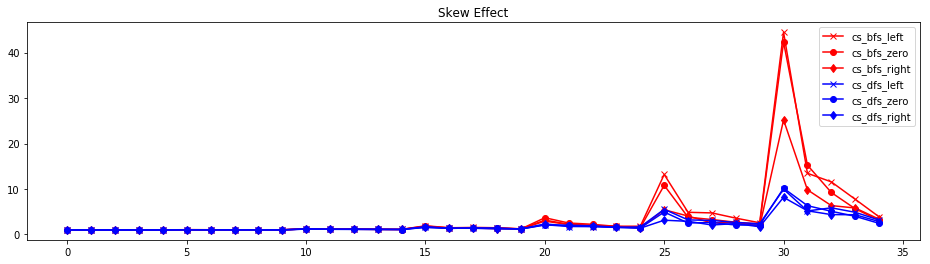

In [173]:
left_skew_results = experiment_results2[experiment_results2['skewness'] == 10]
zero_skew_results = experiment_results2[experiment_results2['skewness'] == 0 ]
right_skew_results = experiment_results2[experiment_results2['skewness'] == -10]


colors = ['r','b']

plt.figure(figsize=(16,4))
plt.title('Skew Effect')
x_values = range(len(left_skew_results.index) // len(algo_names))
for name,color in zip(algo_names, colors):
    plt.plot(x_values, np.exp(left_skew_results[left_skew_results['name'] == name]['execution_time']), marker='x', color=color, label=name+'_left')
    plt.plot(x_values, np.exp(zero_skew_results[zero_skew_results['name'] == name]['execution_time']), marker='o', color=color, label=name+'_zero')
    plt.plot(x_values, np.exp(right_skew_results[right_skew_results['name'] == name]['execution_time']), marker='d', color=color, label=name+'_right')
    
plt.legend();


## Real scale plotlar ciz